In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Raw benchmark instances

In [2]:
df=pd.read_csv('data.csv')
df=df.drop(['map_size','h_cache','mdd_cache'], axis=1)
df[['cpu_time','h_time','mdd_time','emvc_mvc_time','root_h_val','expanded','generated']] = df[['cpu_time','h_time','mdd_time','emvc_mvc_time','root_h_val','expanded','generated']].where(lambda df: df['expanded']!=0, np.nan)
df['search_time'] = df['cpu_time']-df['h_time']-df['mdd_time']
df['graph_time'] = df['h_time']-df['emvc_mvc_time']
df

,num_agents,density,disjoint,heuristic,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time
0,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40,0.0,False,cg,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,25,0.3,False,wdg,120.0,50.44664,44.182916,43.259056,10.0,0.463956,348.0,695.0,5.799767,0.923861
4070,25,0.3,False,wdg,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4071,25,0.3,False,wdg,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4072,25,0.3,False,wdg,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['finished'] = (df['expanded'].notna())

### Success rate graph

In [4]:
groups = df.groupby(['num_agents','density','heuristic','disjoint','time_limit'],as_index=False).mean()
groups

,num_agents,density,heuristic,disjoint,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time,finished
0,10,0.0,cg,False,60.0,0.587501,0.008610,0.0,0.0,0.161119,168.944444,336.888889,0.417773,0.008610,0.9
1,10,0.0,cg,True,60.0,0.303049,0.024810,0.0,0.0,0.111509,35.600000,56.850000,0.166730,0.024810,1.0
2,10,0.0,dg,False,60.0,0.081304,0.010854,0.0,0.2,0.053004,5.850000,10.700000,0.017446,0.010854,1.0
3,10,0.0,dg,True,60.0,0.067646,0.005994,0.0,0.2,0.049552,3.700000,6.200000,0.012100,0.005994,1.0
4,10,0.0,wdg,False,60.0,0.141757,0.055994,0.0,0.2,0.069406,5.850000,10.700000,0.016358,0.055994,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,50,0.4,cg,True,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
200,50,0.4,dg,False,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
201,50,0.4,dg,True,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
202,50,0.4,wdg,False,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [5]:
def success_rate_graph(density, max_agents=50, time_limit=60 ,x_interval=10, size=(5,4), file=None):
    dense = groups[(groups['density']==density) & (groups['time_limit']==time_limit)]
    disjoint_settings = [True,False]
    heuristics_settings = ['cg','dg','wdg']
    plt.figure(figsize=size)
    ls=['-','--','-.']
    for d in disjoint_settings:
        i=0
        for h in heuristics_settings:
            view = dense[(dense['disjoint']==d) & (dense['heuristic']==h) & (dense['num_agents']<=max_agents)]
            name = h.upper()+'_disjoint' if d else h.upper()
            plt.plot(view['num_agents'], view['finished'], label=name, marker='o',alpha=0.7, linestyle=ls[i%3])
            i+=1
    plt.legend()
    plt.xlabel('Agents')
    plt.ylabel('Success Rate')
    plt.xticks(np.arange(10, max_agents, x_interval))
    if file:
        plt.savefig(file)
    plt.show()

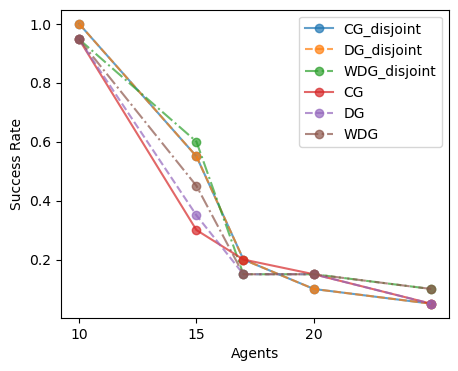

In [6]:
# success_rate_graph(0.3, 25, 120, 5, file='./plots/success_03.png')
success_rate_graph(0.3, 25, 120, 5)

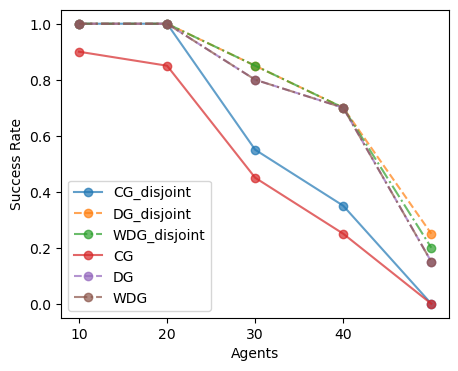

In [7]:
# success_rate_graph(0, 50, 60, 10, file='./plots/success_00.png')
success_rate_graph(0, 50, 60, 10)

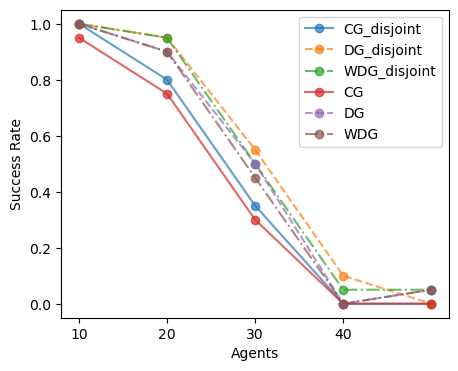

In [8]:
# success_rate_graph(0.1,50,60,10, file='./plots/success_01.png')
success_rate_graph(0.1,50,60,10)

## Mutually Solvable instances

In [9]:
df=pd.read_csv('solvable.csv')
df=df.drop(['map_size','h_cache','mdd_cache'], axis=1)
df[['cpu_time','h_time','mdd_time','emvc_mvc_time','root_h_val','expanded','generated']] = df[['cpu_time','h_time','mdd_time','emvc_mvc_time','root_h_val','expanded','generated']].where(lambda df: df['expanded']!=0, np.nan)
df['search_time'] = df['cpu_time']-df['h_time']-df['mdd_time']
df['graph_time'] = df['h_time']-df['emvc_mvc_time']
df['count']=1
df

,num_agents,density,disjoint,heuristic,time_limit,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time,count
0,10,0.0,True,cg,60.0,0.066982,0.000000,0.000000,0.0,0.051318,2.0,3.0,0.015664,0.000000,1
1,10,0.0,True,cg,60.0,0.046874,0.000000,0.000000,0.0,0.031251,2.0,3.0,0.015623,0.000000,1
2,10,0.0,True,cg,60.0,0.038928,0.000000,0.000000,0.0,0.032036,1.0,1.0,0.006891,0.000000,1
3,10,0.0,True,cg,60.0,0.063105,0.000000,0.000000,0.0,0.062104,2.0,3.0,0.001001,0.000000,1
4,10,0.0,True,cg,60.0,0.077986,0.001000,0.000000,0.0,0.053989,11.0,18.0,0.022997,0.001000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,10,0.4,False,wdg,60.0,2.893013,0.614900,0.014004,4.0,0.450118,336.0,671.0,1.827996,0.600895,1
1088,10,0.4,False,wdg,60.0,1.232007,0.489043,0.016000,6.0,0.331986,67.0,133.0,0.410977,0.473043,1
1089,10,0.4,False,wdg,60.0,20.391003,9.168118,0.072997,8.0,3.799142,805.0,1609.0,7.423742,9.095121,1
1090,10,0.4,False,wdg,60.0,15.701999,5.854232,0.793011,6.0,3.060818,1947.0,3893.0,6.786948,5.061221,1


In [10]:
groups = df.groupby(['heuristic', 'disjoint', 'num_agents','density','time_limit'], as_index=False).sum()
for c in groups.columns[5:-1]:
    groups[c]=groups[c]/groups['count']
groups.columns[5:-1]

Index(['cpu_time', 'h_time', 'emvc_mvc_time', 'root_h_val', 'mdd_time',
       'expanded', 'generated', 'search_time', 'graph_time'],
      dtype='object')

### Root CT node h-values

In [11]:
groups[(groups['density']==0) & (groups['num_agents']<50) & (groups['disjoint']==True)].pivot(index=['num_agents'], columns=['heuristic'], values=['root_h_val'])

root_h_val                    
heuristic          cg        dg       wdg
num_agents                               
10           0.000000  0.111111  0.111111
20           0.117647  0.294118  0.411765
30           0.222222  0.222222  0.444444
40           1.000000  1.750000  2.000000

In [12]:
groups[(groups['density']==0.3) & (groups['num_agents']<=20) & (groups['disjoint']==True) & (groups['time_limit']==120)].pivot(index=['num_agents'], columns=['heuristic'], values=['root_h_val'])

root_h_val                     
heuristic          cg        dg        wdg
num_agents                                
10           1.666667  1.666667   3.555556
15           2.500000  2.500000   5.000000
17           4.000000  4.000000   9.333333
20           4.500000  4.500000  10.000000

In [13]:
groups[(groups['density']==0.1) & (groups['num_agents']<=40) & (groups['disjoint']==True)].pivot(index=['num_agents'], columns=['heuristic'], values=['root_h_val'])

root_h_val                    
heuristic          cg        dg       wdg
num_agents                               
10           0.210526  0.368421  0.526316
20           0.400000  0.600000  0.933333
30           1.666667  1.666667  3.000000

In [14]:
groups[(groups['num_agents']==20) & (groups['density']<=0.3) & (groups['disjoint']==True) & (groups['time_limit']==60)].pivot(index=['density'], columns=['heuristic'], values=['root_h_val'])

root_h_val                     
heuristic         cg        dg        wdg
density                                  
0.0         0.117647  0.294118   0.411765
0.1         0.400000  0.600000   0.933333
0.2         2.142857  2.285714   5.000000
0.3         4.500000  4.500000  10.000000

### Runtime breakdown

In [15]:
groups1 = df[(df['disjoint']==True) & ((df['num_agents']==10) | (df['num_agents']==20))].groupby(['heuristic', 'density','time_limit'], as_index=False).mean()

groups1 = groups1[((groups1['density'] == 0) | ((groups1['density']==0.3) & (groups1['time_limit']==120)))]
groups1['heuristic'] = groups1['heuristic'].str.upper()
groups1 = groups1.set_index('heuristic')
groups1

,density,time_limit,num_agents,disjoint,cpu_time,h_time,emvc_mvc_time,root_h_val,mdd_time,expanded,generated,search_time,graph_time,count
heuristic,,,,,,,,,,,,,,
CG,0.0,60.0,14.857143,True,0.340469,0.011492,0.000114,0.057143,0.106859,28.542857,55.028571,0.222118,0.011378,1.0
CG,0.3,120.0,11.000000,True,1.308158,0.469337,0.344055,1.950000,0.342420,68.150000,127.450000,0.496401,0.125282,1.0
DG,0.0,60.0,14.857143,True,0.194237,0.032871,0.000057,0.200000,0.099546,7.200000,13.342857,0.061820,0.032813,1.0
DG,0.3,120.0,11.000000,True,1.371472,0.567639,0.345233,1.950000,0.241637,71.400000,132.150000,0.562195,0.222406,1.0
WDG,0.0,60.0,14.857143,True,0.200495,0.037933,0.000057,0.257143,0.100744,7.371429,13.371429,0.061818,0.037876,1.0
WDG,0.3,120.0,11.000000,True,2.152624,1.257317,0.331538,4.200000,0.554099,47.700000,86.750000,0.341208,0.925779,1.0


In [16]:
groups1['CBS'] = groups1['search_time']/groups1['expanded']*1000
groups1['Calculate MDD'] = groups1['mdd_time']/groups1['expanded']*1000
groups1['Solve MVC/EWMVC'] = groups1['emvc_mvc_time']/groups1['expanded']*1000
groups1['Compute Graph'] = groups1['graph_time']/groups1['expanded']*1000

In [17]:
groups1.drop(groups1.columns.difference(['density','CBS','Solve MVC/EWMVC','Calculate MDD','Compute Graph']), 1, inplace=True)
# groups1 = groups1[[]]
groups1

,density,CBS,Calculate MDD,Solve MVC/EWMVC,Compute Graph
heuristic,,,,,
CG,0.0,7.781923,3.743800,0.004007,0.398619
CG,0.3,7.283951,5.024509,5.048491,1.838326
DG,0.0,8.586169,13.825789,0.007932,4.557427
DG,0.3,7.873886,3.384268,4.835202,3.114930
WDG,0.0,8.386128,13.666799,0.007750,5.138233
WDG,0.3,7.153216,11.616328,6.950476,19.408371


In [18]:
def runtime_chart(density, size=(5,4), file=None):
    plt.figure(figsize=size)
    groups1[groups1['density']==density].drop('density',axis=1).plot(kind='bar', stacked=True)
    plt.xlabel('Heuristic', fontsize=12)
    plt.ylabel('Runtime per node (ms)', fontsize=12)
    ax = plt.gca()
    ax.set_ylim([0, 50])
    plt.legend(loc=2)
    plt.subplots_adjust(bottom=0.15)
    if file:
        plt.savefig(file)
    plt.show()

<Figure size 500x400 with 0 Axes>

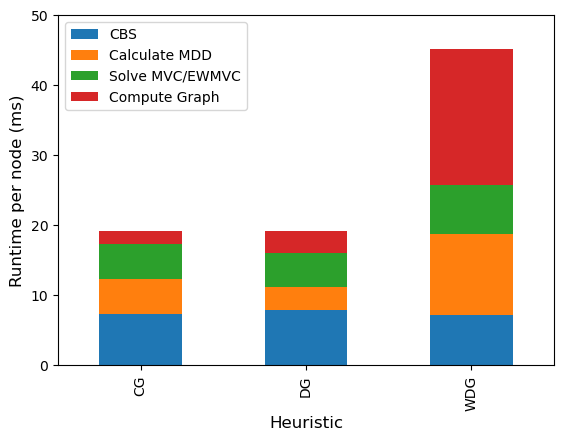

In [19]:
# runtime_chart(0.3, file='./plots/runtime_03.png')
runtime_chart(0.3)

<Figure size 500x400 with 0 Axes>

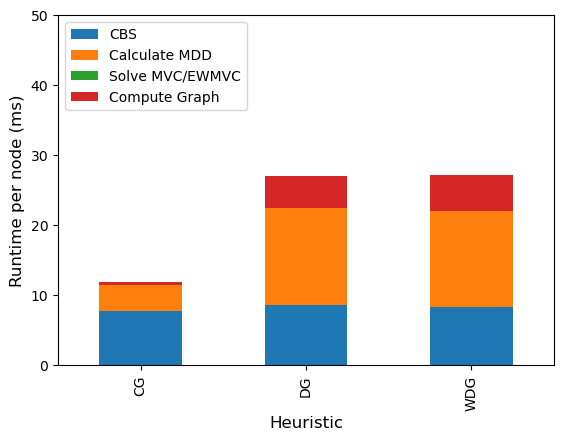

In [20]:
# runtime_chart(0, file='./plots/runtime_00.png')
runtime_chart(0)

### Graphing metrics against density

In [21]:
def density_metric_graph(num_agents, y_metric='expanded', time_limit=60, size=(6,5), file=None):
    dense = groups[(groups['num_agents']==num_agents) & (groups['time_limit']==time_limit)]
    disjoint_settings = [True,False]
    heuristics_settings = ['cg','dg','wdg']
    plt.figure(figsize=size)
    ls=['-','--','-.']
    for d in disjoint_settings:
        i=0
        for h in heuristics_settings:
            view = dense[(dense['disjoint']==d) & (dense['heuristic']==h)]
            name = h.upper()+'_disjoint' if d else h.upper()
            plt.plot(view['density'], view[y_metric], label=name, marker='o',alpha=0.7, linestyle=ls[i%3])
            i+=1
    plt.legend()
    plt.xlabel('Density')
    plt.ylabel(y_metric)
    plt.xticks(np.arange(0, 0.3, 0.1))
    if file:
        plt.savefig(file)
    plt.show()

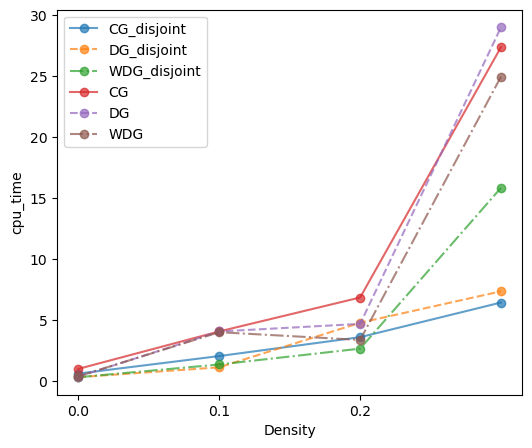

In [22]:
# density_metric_graph(20,'cpu_time',file='cpu_time_density_20.png')
density_metric_graph(20,'cpu_time')

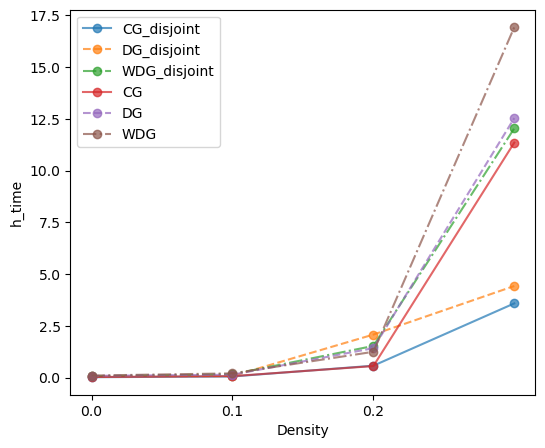

In [23]:
# density_metric_graph(20,'h_time',file='h_time_density_20.png')
density_metric_graph(20,'h_time')

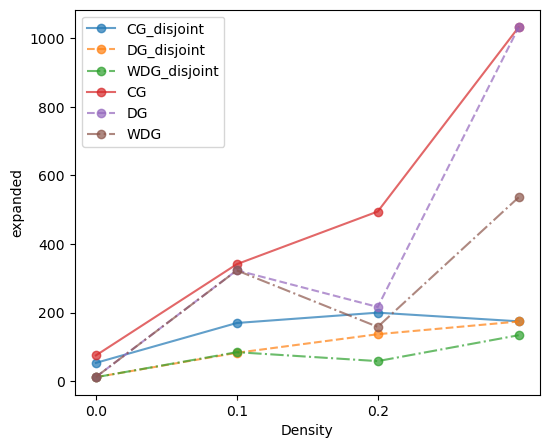

In [24]:
density_metric_graph(20,'expanded')
# density_metric_graph(20,'expanded',file='expanded_density_20.png')

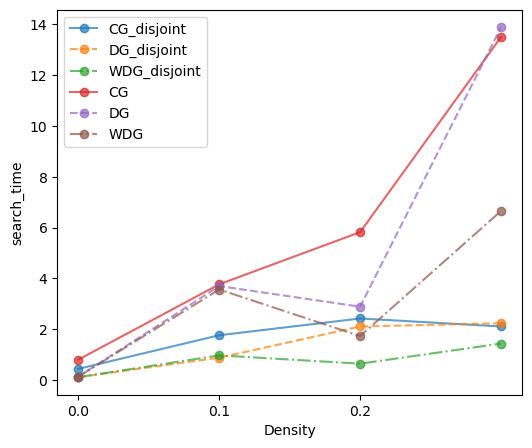

In [25]:
# density_metric_graph(20,'search_time',file='search_time_density_20.png')
density_metric_graph(20,'search_time')

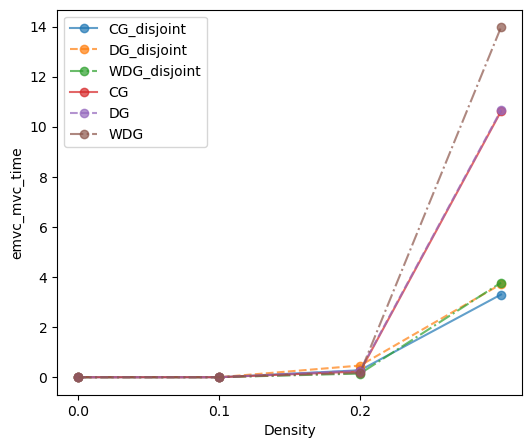

In [26]:
# density_metric_graph(20,'emvc_mvc_time',file='ewmvc_mvc_time_density_20.png')
density_metric_graph(20,'emvc_mvc_time')